In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

In [71]:
svm_df = pd.read_csv('../ML_results/SVM_permutations/SVM_results.csv')

In [72]:
svm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nr_qubits            660 non-null    int64  
 1   machines             660 non-null    int64  
 2   tr&v exp_type        660 non-null    object 
 3   tr&v circuits        660 non-null    int64  
 4   test exp_type        660 non-null    object 
 5   test circuits        660 non-null    int64  
 6   preprocess settings  660 non-null    int64  
 7   kernal               660 non-null    object 
 8   param settings       660 non-null    int64  
 9   accuracy             660 non-null    float64
 10  cv_1                 220 non-null    float64
 11  cv_2                 220 non-null    float64
 12  cv_3                 220 non-null    float64
 13  cv_4                 220 non-null    float64
 14  cv_5                 220 non-null    float64
dtypes: float64(6), int64(6), object(3)
memor

In [73]:
svm_df.head()

,nr_qubits,machines,tr&v exp_type,tr&v circuits,test exp_type,test circuits,preprocess settings,kernal,param settings,accuracy,cv_1,cv_2,cv_3,cv_4,cv_5
0,4,1110,Hardware,111,Hardware,111,0,linear,0,0.992248,1.000000,0.980583,1.000000,0.990196,1.000000
1,4,1110,Hardware,111,Simulation,111,0,linear,0,0.256667,NaN,NaN,NaN,NaN,NaN
2,4,1110,Hardware,111,Refreshed_Simulation,111,0,linear,0,0.156667,NaN,NaN,NaN,NaN,NaN
3,4,1110,Hardware,111,Sim and Refreshed,111,0,linear,0,0.206667,NaN,NaN,NaN,NaN,NaN
4,4,1110,Simulation,111,Simulation,111,0,linear,0,0.662500,0.661458,0.588542,0.609375,0.661458,0.645833


In [74]:
svm_df['cv_avg']=svm_df.loc[:,'cv_1':'cv_5'].mean(axis =1)

In [40]:
svm_df.head()

,nr_qubits,machines,tr&v exp_type,tr&v circuits,test exp_type,test circuits,preprocess settings,kernal,param settings,accuracy,cv_1,cv_2,cv_3,cv_4,cv_5,cv_avg
0,4,1110,Hardware,111,Hardware,111,0,linear,0,0.992248,1.000000,0.980583,1.000000,0.990196,1.000000,0.994156
1,4,1110,Hardware,111,Simulation,111,0,linear,0,0.256667,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1110,Hardware,111,Refreshed_Simulation,111,0,linear,0,0.156667,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1110,Hardware,111,Sim and Refreshed,111,0,linear,0,0.206667,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1110,Simulation,111,Simulation,111,0,linear,0,0.662500,0.661458,0.588542,0.609375,0.661458,0.645833,0.633333


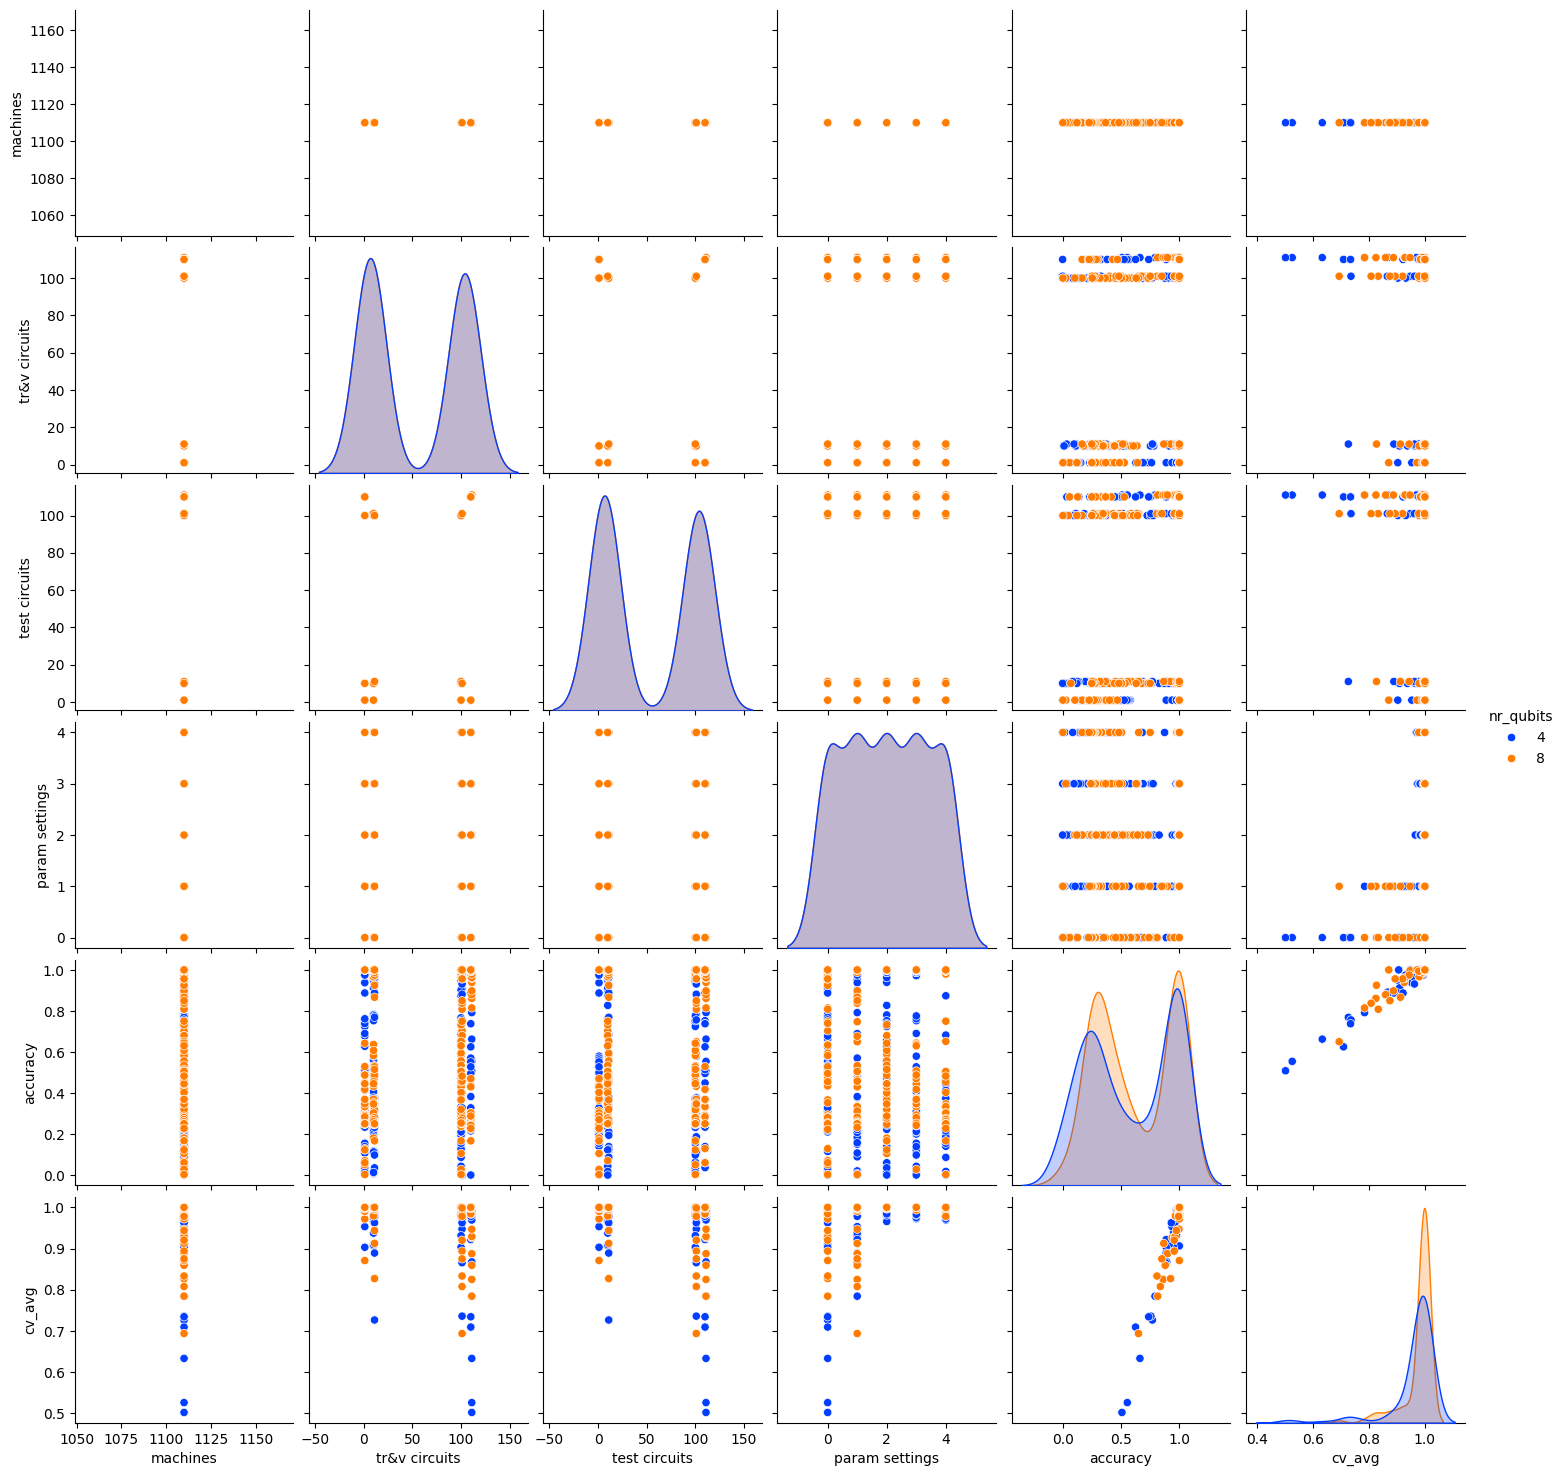

In [52]:
df_self_tests = svm_df[svm_df['tr&v exp_type']==svm_df['test exp_type']]
cvs = ['cv_1','cv_2','cv_3','cv_4','cv_5']
for cv in cvs:
    df_self_tests=df_self_tests.drop(cv,axis = 1)
df_self_tests=df_self_tests.drop('preprocess settings',axis =1)
#df_self_tests=df_self_tests.drop('machines',axis =1)
sns.pairplot(df_self_tests, hue = 'nr_qubits',palette='bright')

In [76]:
def drop_cvs(df):
    cvs = ['cv_1','cv_2','cv_3','cv_4','cv_5']
    for cv in cvs:
        df=df.drop(cv,axis = 1)
    return df
def one_hot_to_int(df):
    one_hots = ['machines','tr&v circuits','test circuits']
    for col in one_hots:
        df[col] = df[col].astype(str)
        df[col]=df[col].apply(lambda x: int(x, 2))
    return df

In [77]:

df_all = svm_df

df_all = drop_cvs(df_all)
df_all = one_hot_to_int(df_all)
df_all=df_all.drop('preprocess settings',axis =1)
df_all.head()


,nr_qubits,machines,tr&v exp_type,tr&v circuits,test exp_type,test circuits,kernal,param settings,accuracy,cv_avg
0,4,14,Hardware,7,Hardware,7,linear,0,0.992248,0.994156
1,4,14,Hardware,7,Simulation,7,linear,0,0.256667,NaN
2,4,14,Hardware,7,Refreshed_Simulation,7,linear,0,0.156667,NaN
3,4,14,Hardware,7,Sim and Refreshed,7,linear,0,0.206667,NaN
4,4,14,Simulation,7,Simulation,7,linear,0,0.662500,0.633333


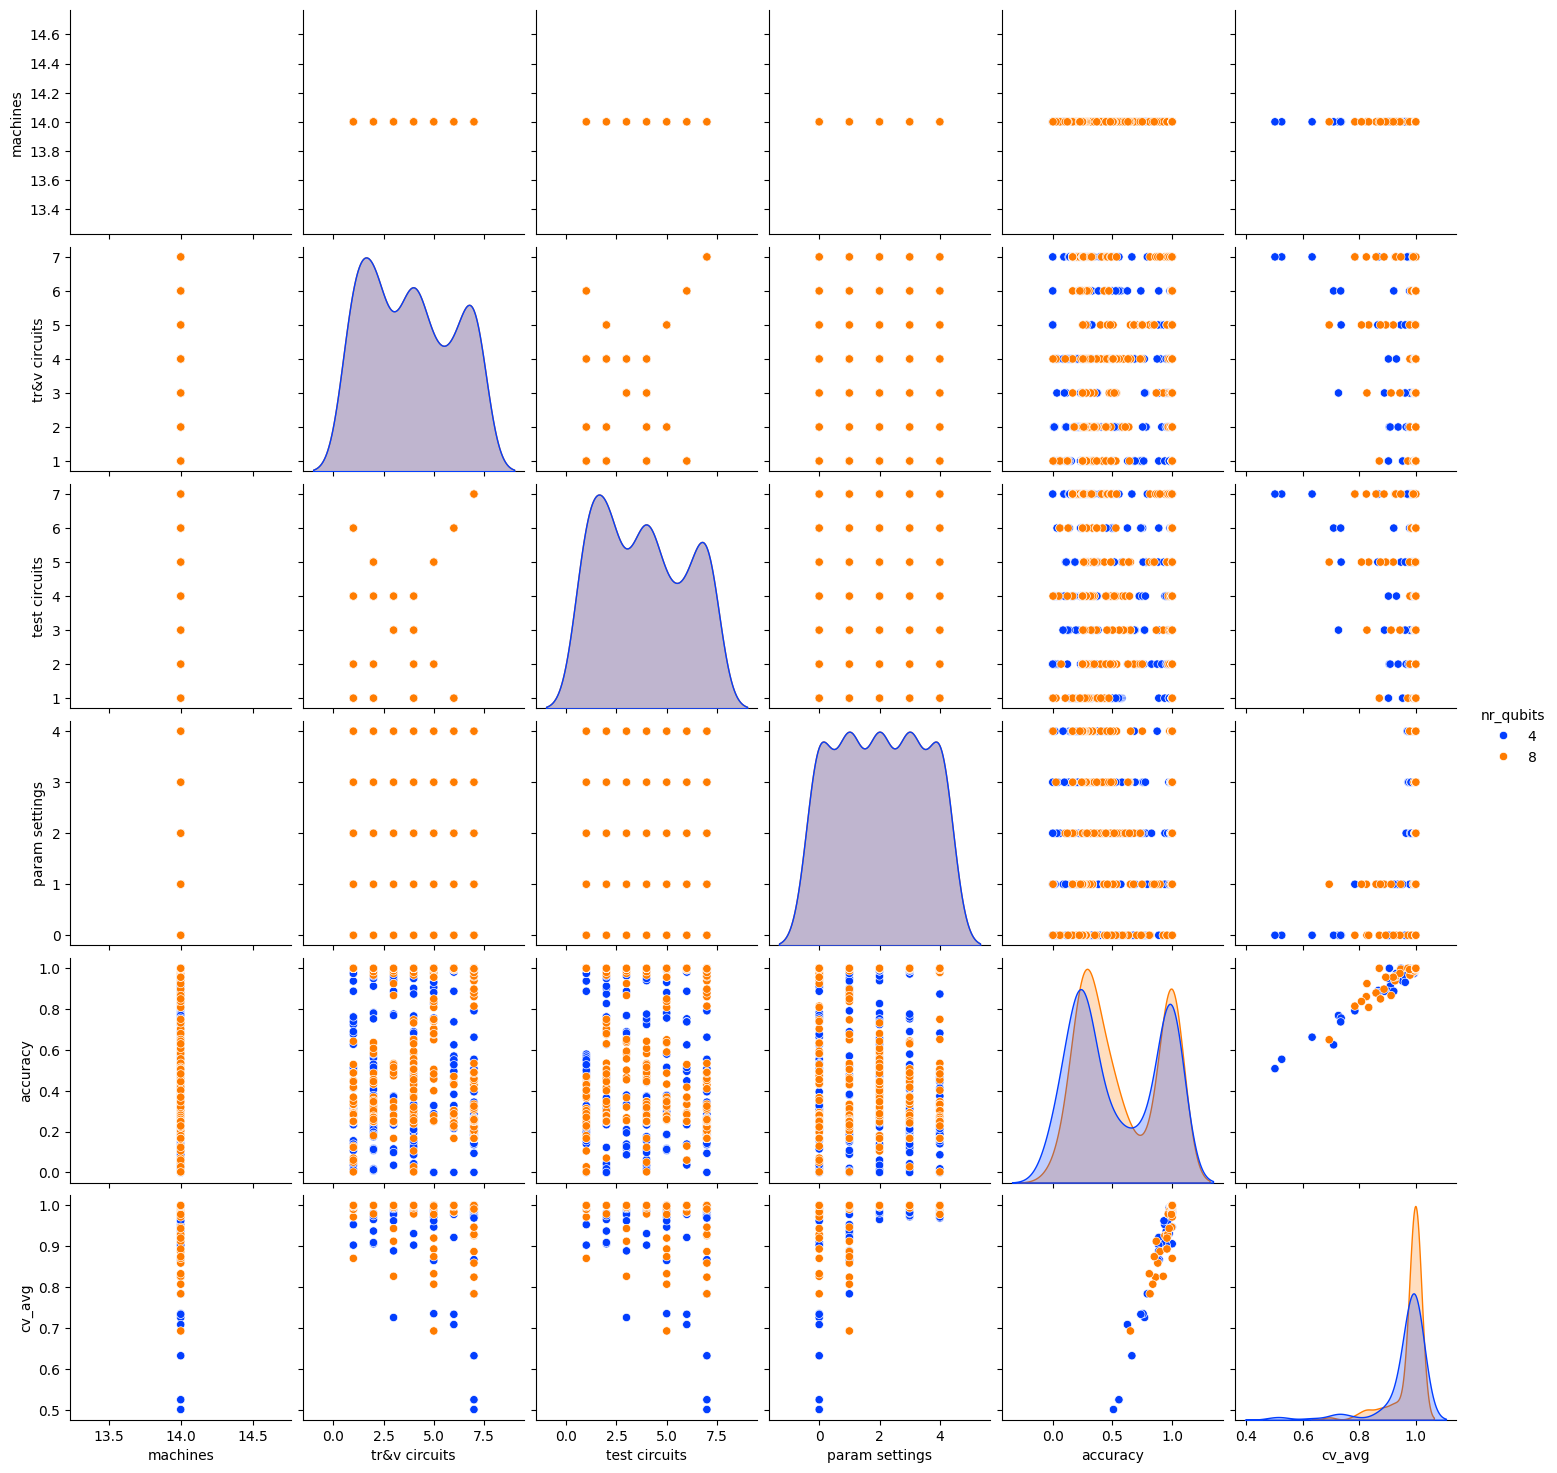

In [78]:

#df_self_tests=df_self_tests.drop('machines',axis =1)
sns.pairplot(df_all, hue = 'nr_qubits',palette='bright')

<Axes: xlabel='tr&v exp_type', ylabel='accuracy'>

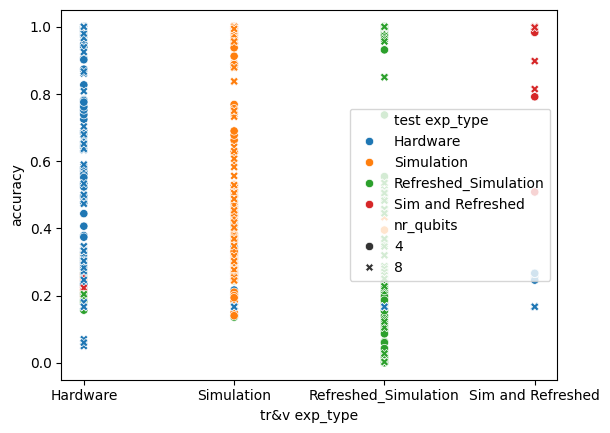

In [96]:
sns.scatterplot(df_all,x= 'tr&v exp_type', y= "accuracy", hue = "test exp_type",style ="nr_qubits")

<Axes: xlabel='test exp_type', ylabel='accuracy'>

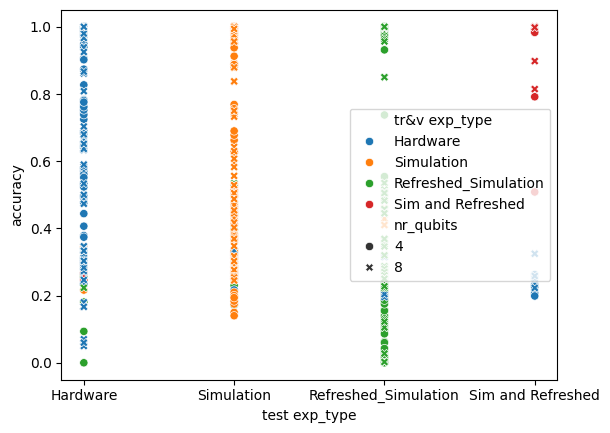

In [94]:
sns.scatterplot(df_all,x= 'test exp_type', y= "accuracy", hue = "tr&v exp_type",style ="nr_qubits")

<Axes: xlabel='test exp_type', ylabel='cv_avg'>

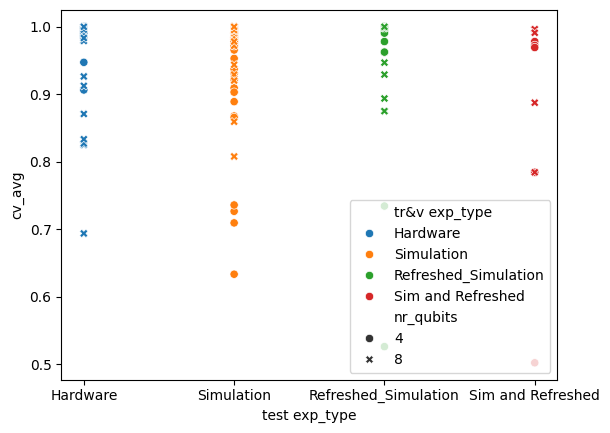

In [95]:
df_self_tests = svm_df[svm_df['tr&v exp_type']==svm_df['test exp_type']]
sns.scatterplot(df_self_tests,x= 'test exp_type', y= "cv_avg", hue = "tr&v exp_type",style = 'nr_qubits')

<Axes: xlabel='param settings', ylabel='cv_avg'>

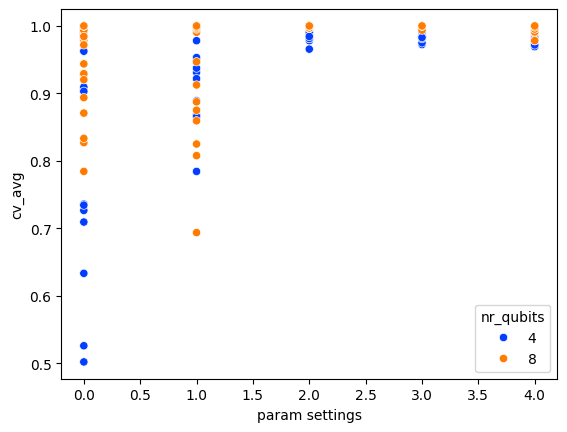

In [87]:
sns.scatterplot(df_self_tests,x= 'param settings', y= "cv_avg", hue = "nr_qubits",palette='bright')

<Axes: xlabel='kernal', ylabel='accuracy'>

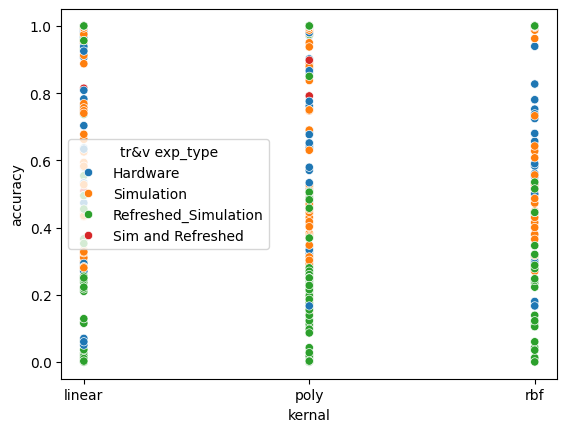

In [14]:
df_self_tests = svm_df[svm_df['tr&v exp_type']==svm_df['test exp_type']]
sns.scatterplot(df_self_tests,x= 'kernal', y= "accuracy", hue = "tr&v exp_type")